In [141]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df=pd.read_csv("Snp 500 Daily 1928.csv")

In [142]:
date=list(df["Date"])
price=list(df["Close"])

yr=range(1928,2021,1)

# Biggest Down & Biggest Up Days

In [192]:
pr=np.array(price)
prt=(pr[1:]-pr[0:-1])/pr[0:-1]*100

x=dict(zip(date[1:],prt))

import operator
s1=sorted(x.items(), key=operator.itemgetter(1))
down=pd.DataFrame(s1[0:20])

s2=sorted(x.items(), key=operator.itemgetter(1), reverse=True)
up=pd.DataFrame(s2[0:20])

# Calculate Number of Days

In [193]:
ytr=1928
k=0

ar=list()

for i in range(len(date)):
    tmp=int(date[i][0:4])
    
    if tmp == ytr:
        k+=1
    else:
        k+=1
    
        ar.append(k)
        ytr+=1
            
        k=0

In [194]:
nar=list()

for i in range(len(ar)+1):
    nar.append(sum(ar[0:i]))

# Extract data for each year

In [197]:
for i in range(len(ar)+1):
    
    if i == len(ar):
        ijk=int(nar[i])

    else:
        
        ix1=int(nar[i])
        ix2=int(nar[i+1])

In [198]:
for i in range(len(ar)+1):
    dp='price'+str(1928+i)
    dt='date'+str(1928+i)
    
    if i == len(ar):
        ix=int(nar[i])
        globals()[dp]=price[ix-1:]
        globals()[dt]=date[ix-1:]
    else:
        
        ix1=int(nar[i])
        ix2=int(nar[i+1])
        globals()[dp]=price[ix1:ix2-1]#date[0:250]
        globals()[dt]=date[ix1:ix2-1]

# Data Classification

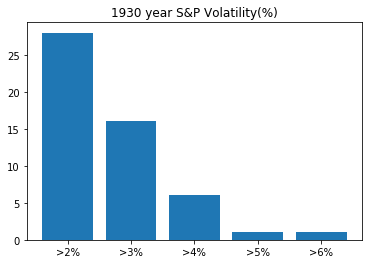

28 16 6 1 1 52


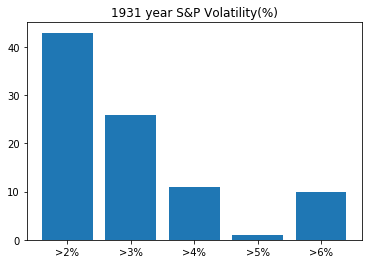

43 26 11 1 10 91


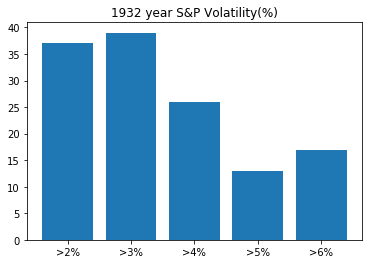

37 39 26 13 17 132


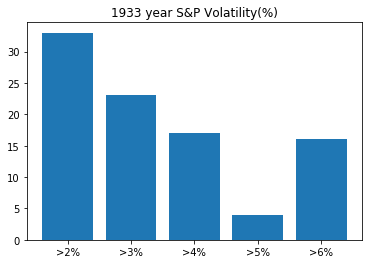

33 23 17 4 16 93


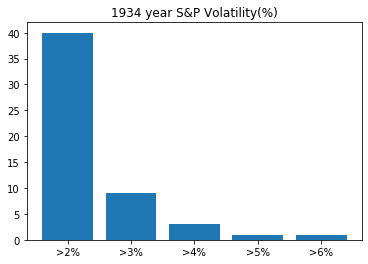

40 9 3 1 1 54


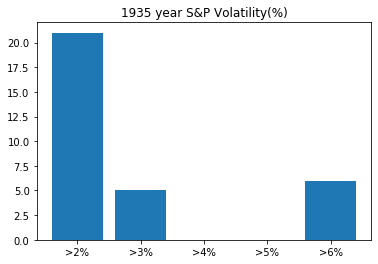

21 5 0 0 6 32


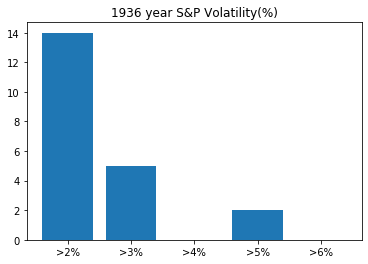

14 5 0 2 0 21


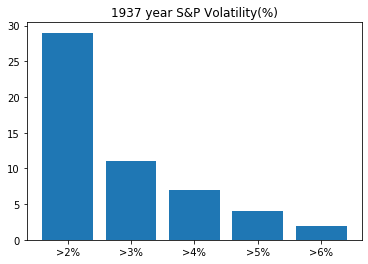

29 11 7 4 2 53


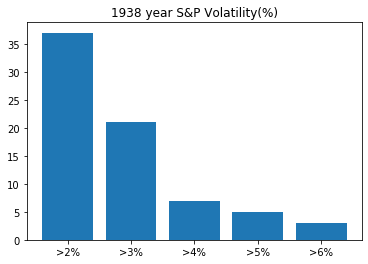

37 21 7 5 3 73


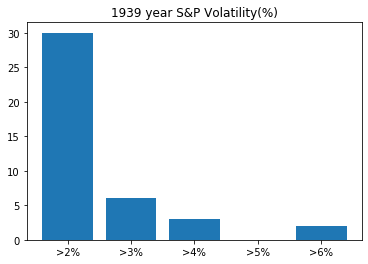

30 6 3 0 2 41


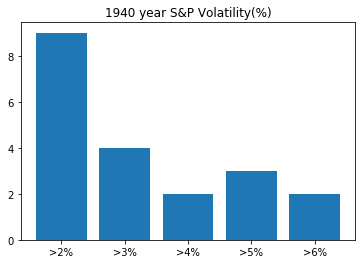

9 4 2 3 2 20


KeyboardInterrupt: 

In [199]:
for st in range(1930,2021):
        
    x=[]

    qq= globals()['price'+str(st)]
    
    for i in range(len( qq)-1):
        x.append ( (qq[i+1]-qq[i])/qq[i]*100)

    #x.sort()
    k0=0; k1=0; k2=0; k3=0; k4=0; k5=0; k6=0;
    
    for val in x:

        if abs(val) > 6:
            k6+=1
        elif abs(val) > 5:
            k5+=1    
        elif abs(val) > 4:
            k4+=1
        elif abs(val) > 3:
            k3+=1
        elif abs(val) > 2:
            k2+=1
        
    p1=[2,3,4,5,6]
    p2=[k2,k3,k4,k5,k6]

    plt.bar(p1,p2)
    plt.title(str(st)+' year S&P Volatility(%)')
    plt.xticks(p1,labels=['>2%','>3%','>4%','>5%','>6%'])
    plt.show()
    print(k2,k3,k4,k5,k6, k0+k1+k2+k3+k4+k5+k6)

# Divide

In [200]:
year=np.zeros(93)

for i in range(93):
    for j in range(len(date)):    
    
        k=1928+i
        if str(k) in date[j]:
            year[i]+=1

In [201]:
sr_ix=[]
sr_date=[]

for i in range(len(year)-1):
    ix=int(np.sum(year[:i]))
    
    sr_ix.append(ix)
    sr_date.append(date[ix])

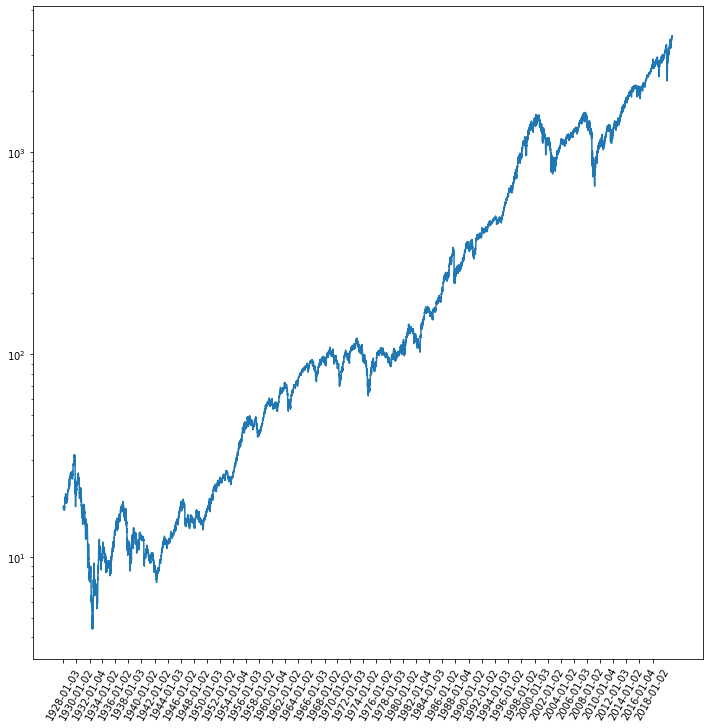

In [202]:
plt.figure(figsize=(12,12))
plt.plot(date,price)
plt.xticks(sr_ix[::2], sr_date[::2],rotation=60)
plt.yscale('log')
plt.show()